In [1]:
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from helpers_coint import *

In [10]:
import os
folder = 'demo_data/'
path = './'+folder
data_csv = os.listdir(path)

print(data_csv)

['RIO.L_clean.csv', 'KGF.L_clean.csv', 'BREE.L_clean.csv', 'LAND.L_clean.csv', 'BARC.L_clean.csv', 'ESP.L_clean.csv', 'FGP.L_clean.csv', 'DLG.L_clean.csv', 'PSON.L_clean.csv', 'TLW.L_clean.csv']


In [11]:

p_crit  = 0.05
daily_data_f = False
output_folder = './demo_results/'
output_file_name = 'demo_res'

output_file_name = output_folder+output_file_name

In [12]:
score_mat, p_mat, pairs = find_coint_pairs(path,data_csv,pval_crit=p_crit,formation_period_days=500,adj4day=daily_data_f)

pval =  0.019477784614776714 ( RIO.L_clean.csv / LAND.L_clean.csv )
--------------------------------------------------
pval =  0.02637228213814467 ( BREE.L_clean.csv / BARC.L_clean.csv )
--------------------------------------------------
pval =  0.014526432627809241 ( BREE.L_clean.csv / DLG.L_clean.csv )
--------------------------------------------------
pval =  0.03298617636665134 ( LAND.L_clean.csv / DLG.L_clean.csv )
--------------------------------------------------
pval =  0.011765971823524724 ( ESP.L_clean.csv / FGP.L_clean.csv )
--------------------------------------------------
pval =  0.012605206913097208 ( ESP.L_clean.csv / DLG.L_clean.csv )
--------------------------------------------------
pval =  0.001495938243169362 ( DLG.L_clean.csv / PSON.L_clean.csv )
--------------------------------------------------


<Axes: >

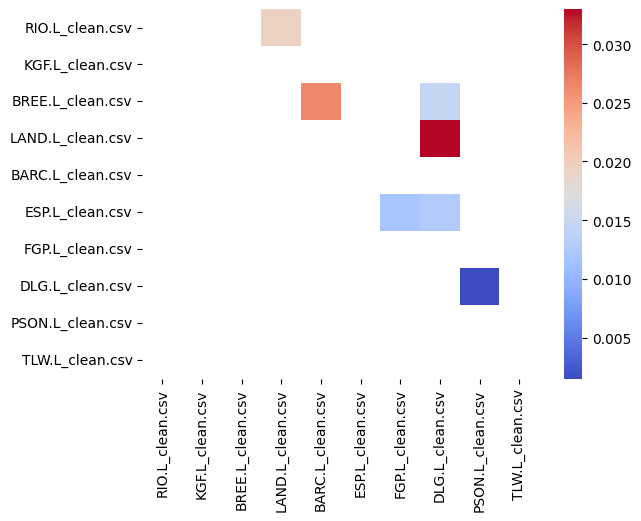

In [13]:
import seaborn as sns
mask = (p_mat == 0) | (p_mat>=p_crit)
sns.heatmap(p_mat, xticklabels=data_csv,yticklabels=data_csv,cmap='coolwarm',mask = mask)

In [14]:
pairs

[('RIO.L_clean.csv', 'LAND.L_clean.csv'),
 ('BREE.L_clean.csv', 'BARC.L_clean.csv'),
 ('BREE.L_clean.csv', 'DLG.L_clean.csv'),
 ('LAND.L_clean.csv', 'DLG.L_clean.csv'),
 ('ESP.L_clean.csv', 'FGP.L_clean.csv'),
 ('ESP.L_clean.csv', 'DLG.L_clean.csv'),
 ('DLG.L_clean.csv', 'PSON.L_clean.csv')]

In [15]:
pair_beta = get_hedge_ratio(path,pairs)
stds, means = get_std_n_ma(path,pairs, pair_beta)


In [16]:
import csv
with open(output_file_name+"_beta.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'Beta'])
    for k,v in pair_beta.items():
        wr.writerow([k,v])

with open(output_file_name+"_stds.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'std'])
    for k,v in stds.items():
        wr.writerow([k,v])

with open(output_file_name+"_means.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'mean'])
    for k,v in means.items():
        wr.writerow([k,v])

        

beta:  0.8791881930387925
mean:  -143.09398425828903
mean ± 2sigma:  -107.43083460864736 ;  -178.7571339079307
mean ± 3sigma:  -89.59925978382651 ;  -196.58870873275154
('BREE.L_clean.csv', 'BARC.L_clean.csv')


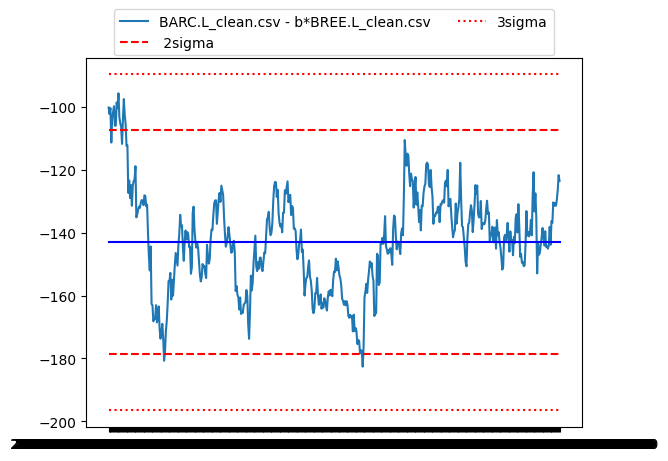

In [33]:
i = 1
print('beta: ', pair_beta[pairs[i]])
print('mean: ', means[pairs[i]])
print('mean ± 2sigma: ',means[pairs[i]]+ 2*stds[pairs[i]],'; ',means[pairs[i]]-2*stds[pairs[i]])
print('mean ± 3sigma: ',means[pairs[i]]+ 3*stds[pairs[i]],'; ',means[pairs[i]]-3*stds[pairs[i]])
    #   , means[pairs[i]]+2*stds[pairs[i]], means(pairs[i])- 2*stds[pairs[i]])

plot_pair(path,pairs[i],pair_beta[pairs[i]],means[pairs[i]], stds[pairs[i]])